2. English Premier League data
Dataset link: https://github.com/insaid2018/Term-1/blob/master/Data/Projects/English_Premier_League.csv


## Problem Statement:
To explore the English Premier League data, so as to understand how it has fared across different seasons and evolved over the years. Analysis can help to determine trends in league over a season from August to May.

### To perform analysis on:
- Performance of teams over the years
- Goal scoring behavior of teams
- League progress over a season

### To determine:
- How to sustain in the league?
- How to win the league?
- What are the shortcomings in the league? And suggest suitable changes to improve the league conditions.


#### Description of the Dataset

This dataset contains results from every Premier League match from 1993-1994 to 2017-2018. Columns include Division (denoted as E0), HomeTeam, AwayTeam, FTHG (final time home goals), FTAG (final time away goals), FTR (full time result), HTHG (half time home goals), HTAG (half time away goals), HTR (half time result), and season.


## Table of content
1. [Importing packages](#section1)<br/>
2. [Importing EPL Dataset](#section2)<br/>
3. [Pre-profiling of dataset](#section3)<br/>
4. [Pre-processing of dataset](#section4)<br/>
5. [Post-profiling of dataset](#section5)
 - 5.1. [Goal scoring behavior of teams](#section501)<br>
 - 5.2. [Performance of teams over the years](#section502)<br>
 - 5.3. [League progress over a season](#section503)<br>
6. [How to win, sustain in Premier league](#section6)<br/>
7. [Conclusion](#section7)<br/>
8. [Actionable Insights](#section8)<br/>

<a id=section1></a>
### 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                 
%matplotlib inline
import datetime as dt

<a id=section2></a>
### 2. Importing EPL Dataset

In [2]:
df_epl = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv")
df_epl.head(11)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
5,E0,14/08/93,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,1993-94
6,E0,14/08/93,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,1993-94
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94
8,E0,14/08/93,Southampton,Everton,0,2,A,NaN,NaN,NaN,1993-94
9,E0,14/08/93,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,1993-94


<a id=section3></a>
### 3. Pre-profiling of dataset

In [3]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [4]:
!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\aniket\anaconda3\lib\site-packages (2.9.0)


In [5]:
import pandas_profiling 
profile = df_epl.profile_report(title = "EPL Dataset")
profile.to_file(output_file = "epldataset.html")

<a id=section4></a>
### 4. Pre-processing of dataset

In [6]:
duplicates = df_epl[df_epl.duplicated(keep = 'first')]
print('There are {} duplicates out of total {} rows.'.format(duplicates.shape[0], df_epl.shape[0]))

There are 0 duplicates out of total 9664 rows.


In [7]:
df_epl["Season"] = df_epl["Season"].astype('str')
df_epl["HomeTeam"] = df_epl["HomeTeam"].astype('category')
df_epl["AwayTeam"] = df_epl["AwayTeam"].astype('category')
df_epl["FTHG"] = df_epl["FTHG"].astype(int)
df_epl["FTAG"] = df_epl["FTAG"].astype(int)
df_epl["FTR"] = df_epl["FTR"].astype('category')
df_epl["HTHG"] = df_epl["HTHG"].astype(float)
df_epl["HTAG"] = df_epl["HTAG"].astype(float)
df_epl["HTR"] = df_epl["HTR"].astype('category')

In [8]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Div       9664 non-null   object  
 1   Date      9664 non-null   object  
 2   HomeTeam  9664 non-null   category
 3   AwayTeam  9664 non-null   category
 4   FTHG      9664 non-null   int32   
 5   FTAG      9664 non-null   int32   
 6   FTR       9664 non-null   category
 7   HTHG      8740 non-null   float64 
 8   HTAG      8740 non-null   float64 
 9   HTR       8740 non-null   category
 10  Season    9664 non-null   object  
dtypes: category(4), float64(2), int32(2), object(3)
memory usage: 496.9+ KB


<a id=section5></a>
### 5. Post-profiling of dataset

In [9]:
import pandas_profiling 
profile = df_epl.profile_report(title = "EPL Dataset")
profile.to_file(output_file = "epldatasets.html")

In [11]:
df_epl['AwayTeam'].nunique

<bound method IndexOpsMixin.nunique of 0             Coventry
1                  QPR
2            Blackburn
3       Sheffield Weds
4                Leeds
             ...      
9659           Chelsea
9660          Man City
9661             Stoke
9662         Leicester
9663           Everton
Name: AwayTeam, Length: 9664, dtype: category
Categories (50, object): [Arsenal, Aston Villa, Barnsley, Birmingham, ..., West Ham, Wigan, Wimbledon, Wolves]>

In [24]:
df_epl['AwayTeam'].unique()

[Coventry, QPR, Blackburn, Sheffield Weds, Leeds, ..., Swansea, Cardiff, Bournemouth, Huddersfield, Brighton]
Length: 50
Categories (50, object): [Coventry, QPR, Blackburn, Sheffield Weds, ..., Cardiff, Bournemouth, Huddersfield, Brighton]

In [10]:
df_epl['HomeTeam'].nunique

<bound method IndexOpsMixin.nunique of 0           Arsenal
1       Aston Villa
2           Chelsea
3         Liverpool
4          Man City
           ...     
9659      Newcastle
9660    Southampton
9661        Swansea
9662      Tottenham
9663       West Ham
Name: HomeTeam, Length: 9664, dtype: category
Categories (50, object): [Arsenal, Aston Villa, Barnsley, Birmingham, ..., West Ham, Wigan, Wimbledon, Wolves]>

In [25]:
df_epl['HomeTeam'].unique()

[Arsenal, Aston Villa, Chelsea, Liverpool, Man City, ..., Swansea, Cardiff, Bournemouth, Brighton, Huddersfield]
Length: 50
Categories (50, object): [Arsenal, Aston Villa, Chelsea, Liverpool, ..., Cardiff, Bournemouth, Brighton, Huddersfield]

Number of games played by **Home team**

In [12]:
df_epl['HomeTeam'].value_counts()

Liverpool           479
Tottenham           479
Chelsea             479
Everton             479
Man United          479
Arsenal             479
Newcastle           441
Aston Villa         441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Middlesbrough       247
Fulham              247
Bolton              247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Charlton            152
Wigan               152
Norwich             137
Sheffield Weds      137
Wimbledon           137
Derby               133
Portsmouth          133
Birmingham          133
Swansea             133
QPR                 118
Hull                 95
Watford              95
Ipswich              80
Nott'm Forest        78
Burnley              76
Wolves               76
Bournemouth          57
Reading              57
Sheffield United     40
Bradford        

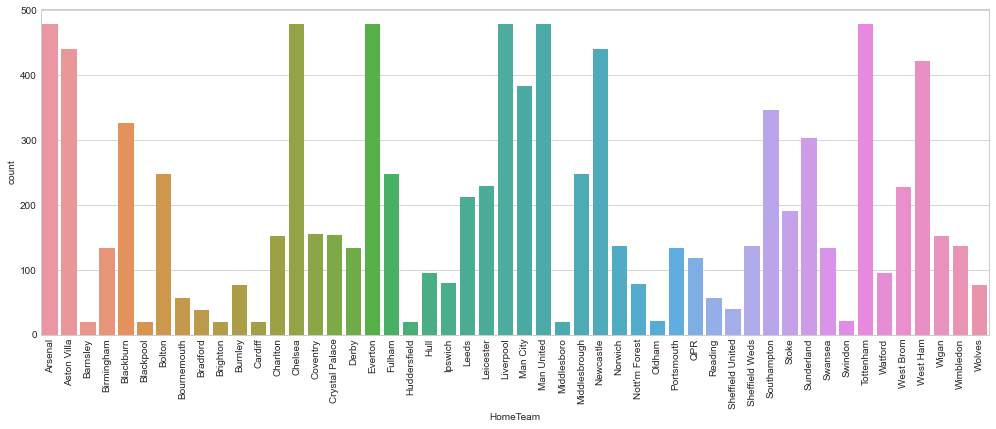

In [14]:
plt.figure(figsize=(17, 6))
sns.countplot(x='HomeTeam', data=df_epl)
plt.xticks(rotation='vertical')
plt.show()

Number of games played by **Away team**

In [13]:
df_epl['AwayTeam'].value_counts()

Liverpool           479
Tottenham           479
Chelsea             479
Everton             479
Man United          479
Arsenal             479
Newcastle           441
Aston Villa         441
West Ham            422
Man City            384
Southampton         346
Blackburn           327
Sunderland          304
Middlesbrough       247
Fulham              247
Bolton              247
Leicester           230
West Brom           228
Leeds               213
Stoke               190
Coventry            156
Crystal Palace      154
Charlton            152
Wigan               152
Norwich             137
Sheffield Weds      137
Wimbledon           137
Derby               133
Portsmouth          133
Birmingham          133
Swansea             133
QPR                 118
Hull                 95
Watford              95
Ipswich              80
Nott'm Forest        78
Burnley              76
Wolves               76
Bournemouth          57
Reading              57
Sheffield United     40
Bradford        

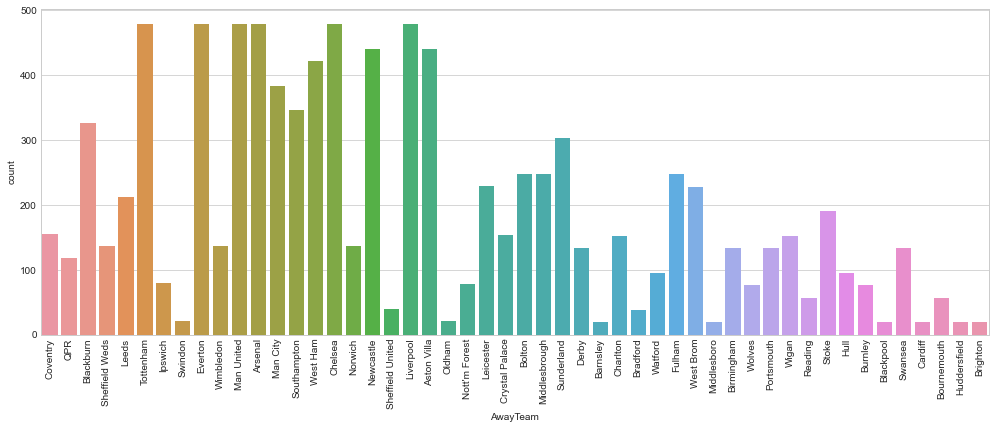

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(17, 6))
sns.countplot(x='AwayTeam', data=df_epl)
plt.xticks(rotation='vertical')
plt.show()
plt.savefig('C:/Users/aniket/Desktop/My files/Away total game.jpg')

<a id=section501></a>
### 5.1 Goal scoring behavior of teams

**Total number of goals scored by team at Home at full time**

In [16]:
df_epl['FTHG'].value_counts()

1    3124
2    2356
0    2261
3    1176
4     497
5     166
6      53
7      23
8       6
9       2
Name: FTHG, dtype: int64

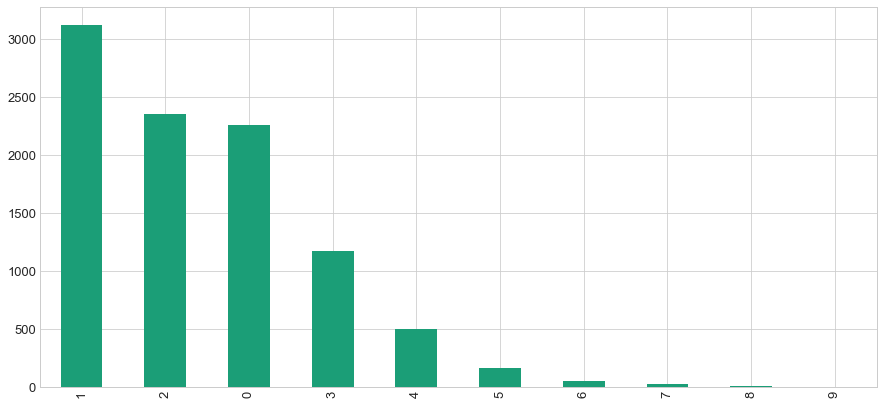

In [51]:
df_epl['FTHG'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

From above we can see that single goal has been scored for more than 3000 times at Home by Home team

**Total number of goals scored by team at Away at full time**

In [18]:
df_epl['FTAG'].value_counts()

1    3366
0    3359
2    1804
3     791
4     260
5      57
6      24
7       2
8       1
Name: FTAG, dtype: int64

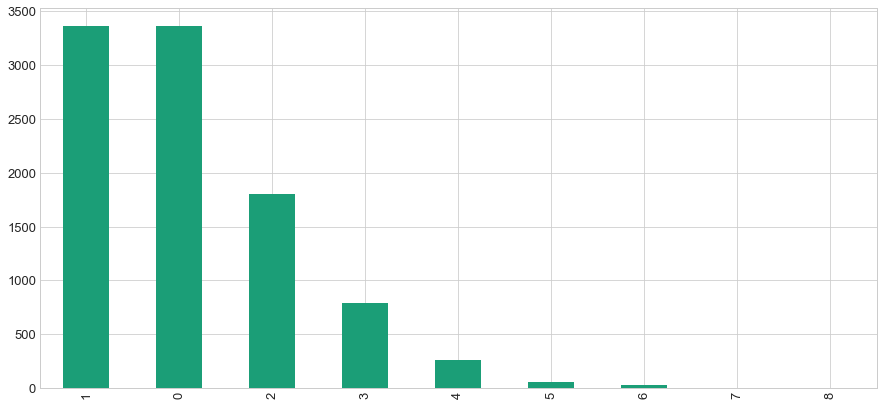

In [19]:
df_epl['FTAG'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

From above we can see that single goal has been scored for more than 3000 times on away ground by Away team

Text(0.5, 1.0, '')

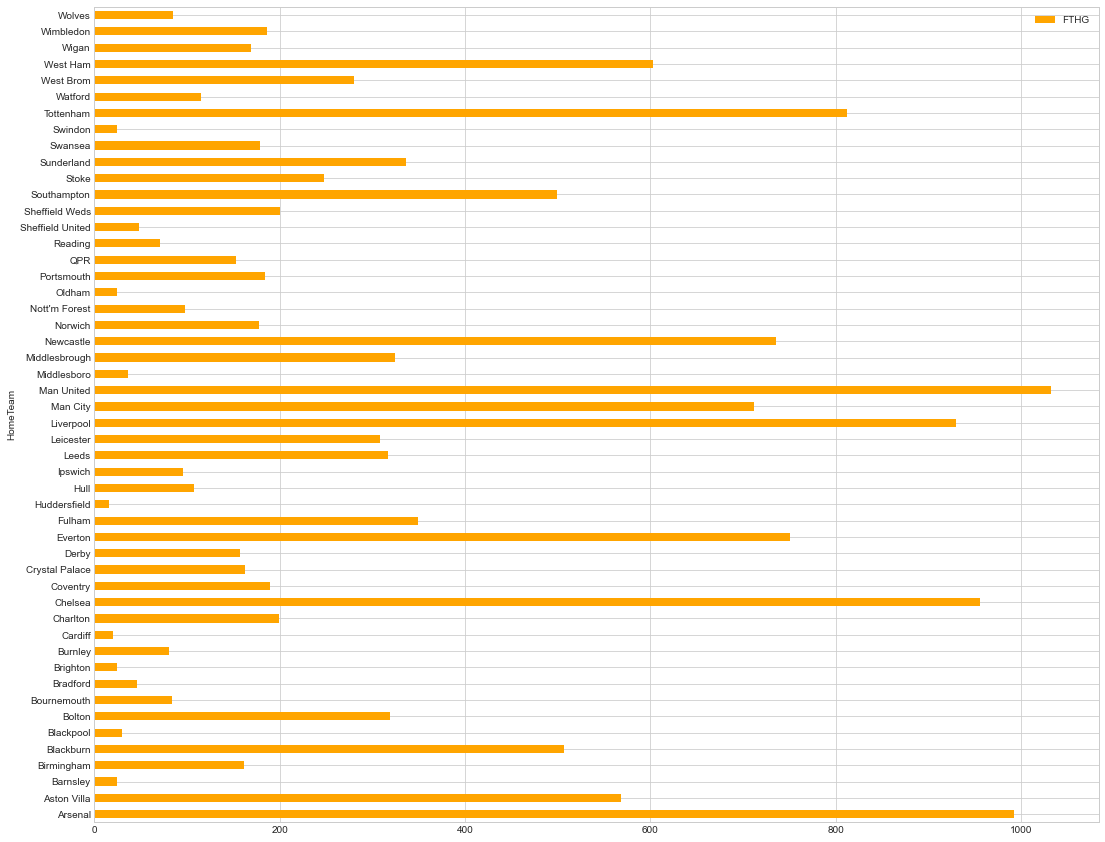

In [36]:
#Home team goal scored
plt.rcParams['figure.figsize'] = [18, 15]
df_epl[['HomeTeam',
 'FTHG']].groupby('HomeTeam').sum().plot.barh(
 color='orange')
plt.title('')


So, Manchester United has scored more goals at Home

Text(0.5, 1.0, '')

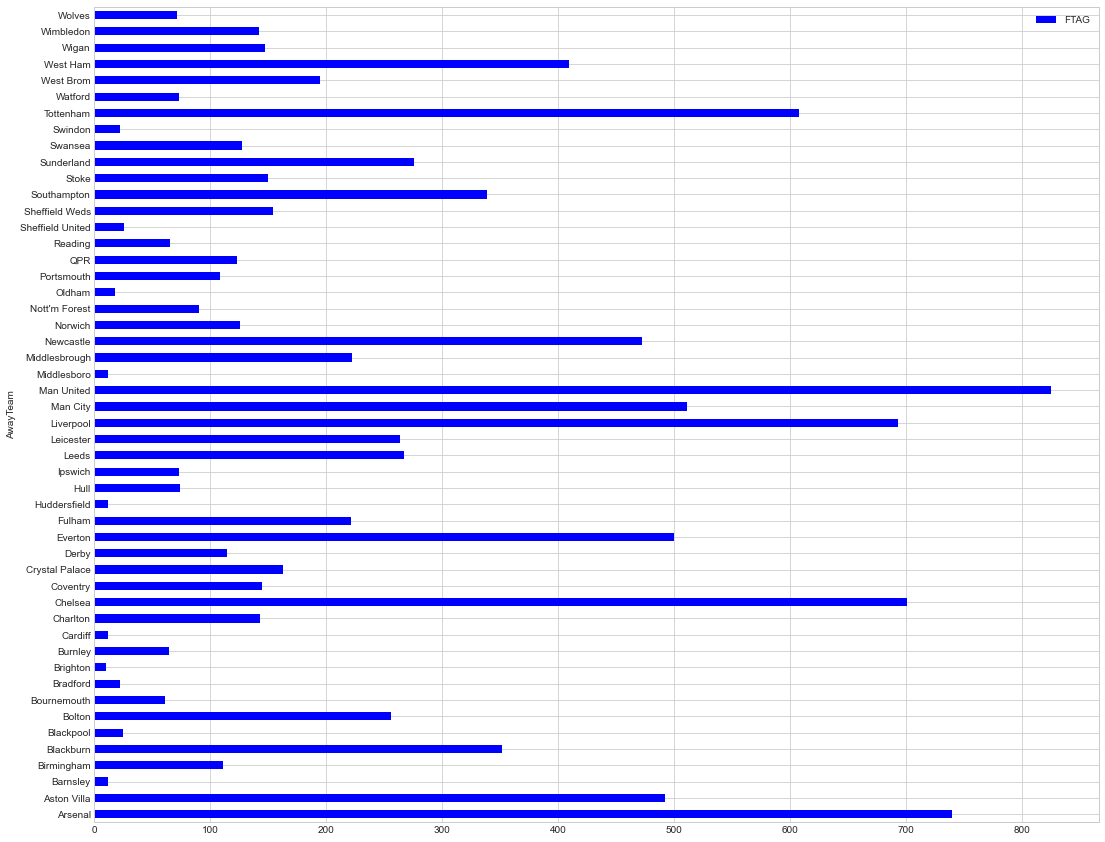

In [37]:
#Away teams goal scored
plt.rcParams['figure.figsize'] = [18, 15]
df_epl[['AwayTeam',
 'FTAG']].groupby('AwayTeam').sum().plot.barh(
 color='blue')
plt.title('')

So, Manchester united has scored more goals on away ground for past 26 years

<a id=section502></a>
### 5.2 Performance of teams over years

In [16]:
conditions=[df_epl['FTR']=='A',df_epl['FTR']=='H',df_epl['FTR']=='D']
choices = [df_epl['AwayTeam'],df_epl['HomeTeam'],'Draw']
df_epl['Winner']=np.select(conditions,choices)

In [17]:
a=df_epl.loc[:,['Season','Winner']]
b=a.groupby(['Season', 'Winner']).size().reset_index(name='counts')
c=b.sort_values(['Season', 'counts'], ascending=[True, False])
c

,Season,Winner,counts
5,1993-94,Draw,142
11,1993-94,Man United,27
2,1993-94,Blackburn,25
12,1993-94,Newcastle,23
0,1993-94,Arsenal,18
...,...,...,...
516,2017-18,Huddersfield,9
524,2017-18,Swansea,8
522,2017-18,Southampton,7
523,2017-18,Stoke,7


Thus from the above data we can see that every season has a lot of draws. Though these matches add points to the overall score for each team, it cannot be taken as a match won and thus **To further analyse we can check without the Draw matches**.

In [18]:
d=c[c.Winner.str.contains('Draw')==False].reset_index()
d

,index,Season,Winner,counts
0,11,1993-94,Man United,27
1,2,1993-94,Blackburn,25
2,12,1993-94,Newcastle,23
3,0,1993-94,Arsenal,18
4,8,1993-94,Leeds,18
...,...,...,...,...
499,516,2017-18,Huddersfield,9
500,524,2017-18,Swansea,8
501,522,2017-18,Southampton,7
502,523,2017-18,Stoke,7


Now we can print the *Team that has won most of the matches in each Season*.

In [19]:
e=d.groupby('Season').head(1)
e

,index,Season,Winner,counts
0,11,1993-94,Man United,27
22,25,1994-95,Blackburn,27
44,57,1995-96,Man United,25
64,78,1996-97,Man United,21
84,88,1997-98,Arsenal,23
104,109,1998-99,Arsenal,22
124,141,1999-00,Man United,28
144,165,2000-01,Man United,24
164,172,2001-02,Arsenal,26
184,206,2002-03,Man United,25


Now that we know which Team has won the most number of matches every year. We can check which team has won the most for the past 26 years.

In [20]:
z=e['Winner'].value_counts().reset_index()
z

,index,Winner
0,Man United,11
1,Chelsea,5
2,Arsenal,4
3,Man City,3
4,Leicester,1
5,Blackburn,1


Therefore **Manchester united has won more matches in last 26 years**.

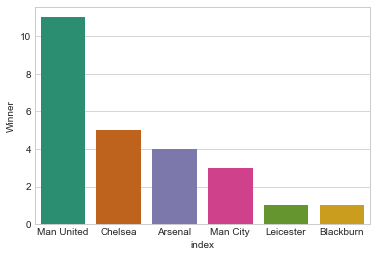

In [33]:
#Plotting the Teams and number of Seasons they have won in the past 26 years.
sns.barplot(x='index', y='Winner', data=z, palette='Dark2')

Since Manchester United has won more in past 26 years we check there overall wins every year

In [21]:
manutd = df_epl.loc[df_epl['Winner'] == 'Man United']
count_series = manutd.groupby(['Season']).size()
mancount = pd.DataFrame(data=count_series, columns=['Wins']).reset_index()
mancount

,Season,Wins
0,1993-94,27
1,1994-95,26
2,1995-96,25
3,1996-97,21
4,1997-98,23
5,1998-99,22
6,1999-00,28
7,2000-01,24
8,2001-02,24
9,2002-03,25


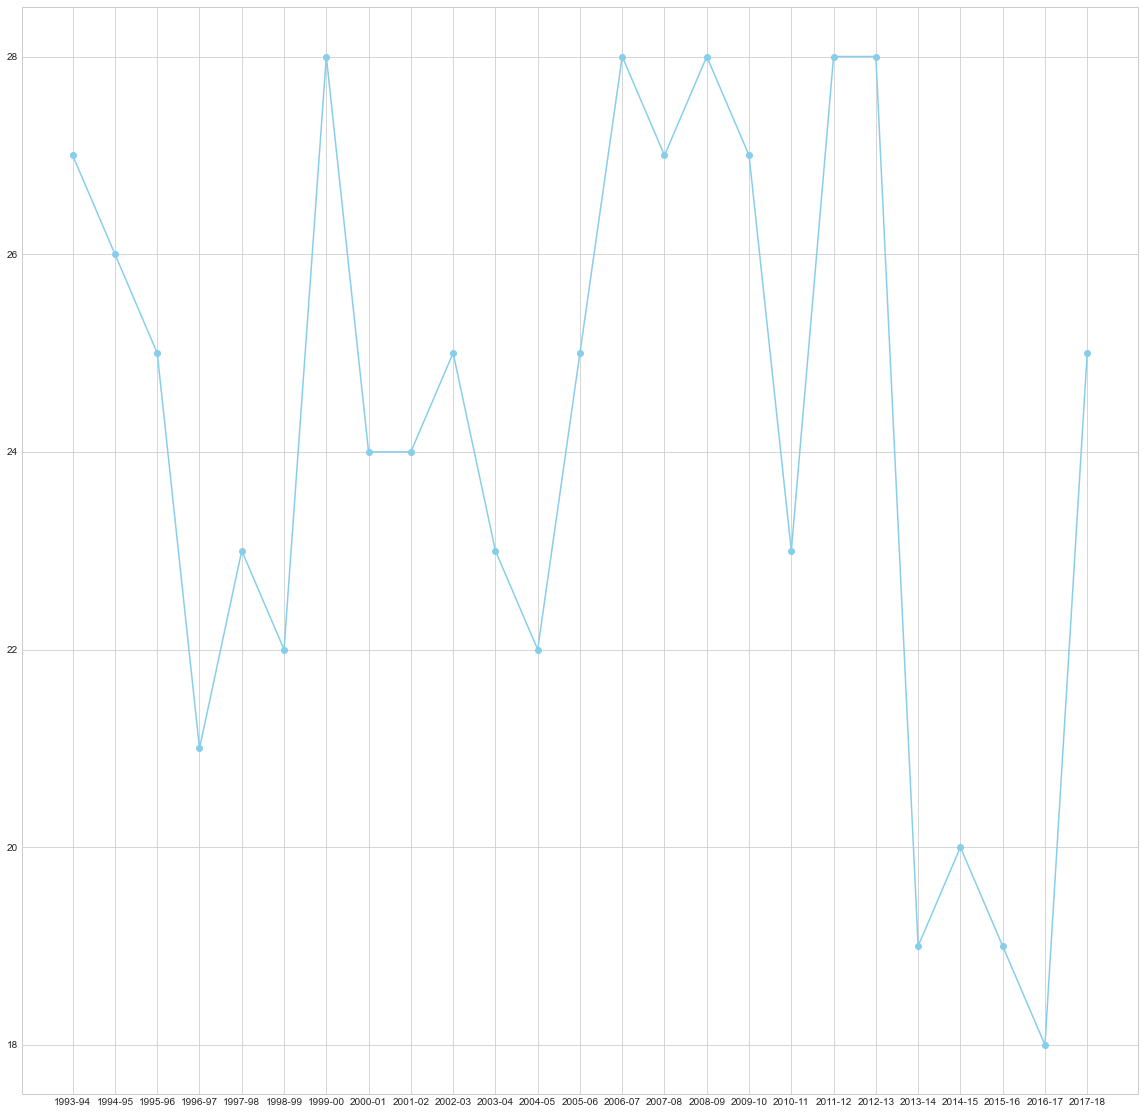

In [35]:
plt.figure(figsize=(20, 20))
plt.plot('Season', 'Wins', data=mancount, marker='o', color='skyblue')
plt.show()

In [23]:
utd = df_epl.groupby(['Season','HomeTeam']).FTHG.sum().reset_index()
utd = utd.loc[utd['HomeTeam'] == 'Man United']

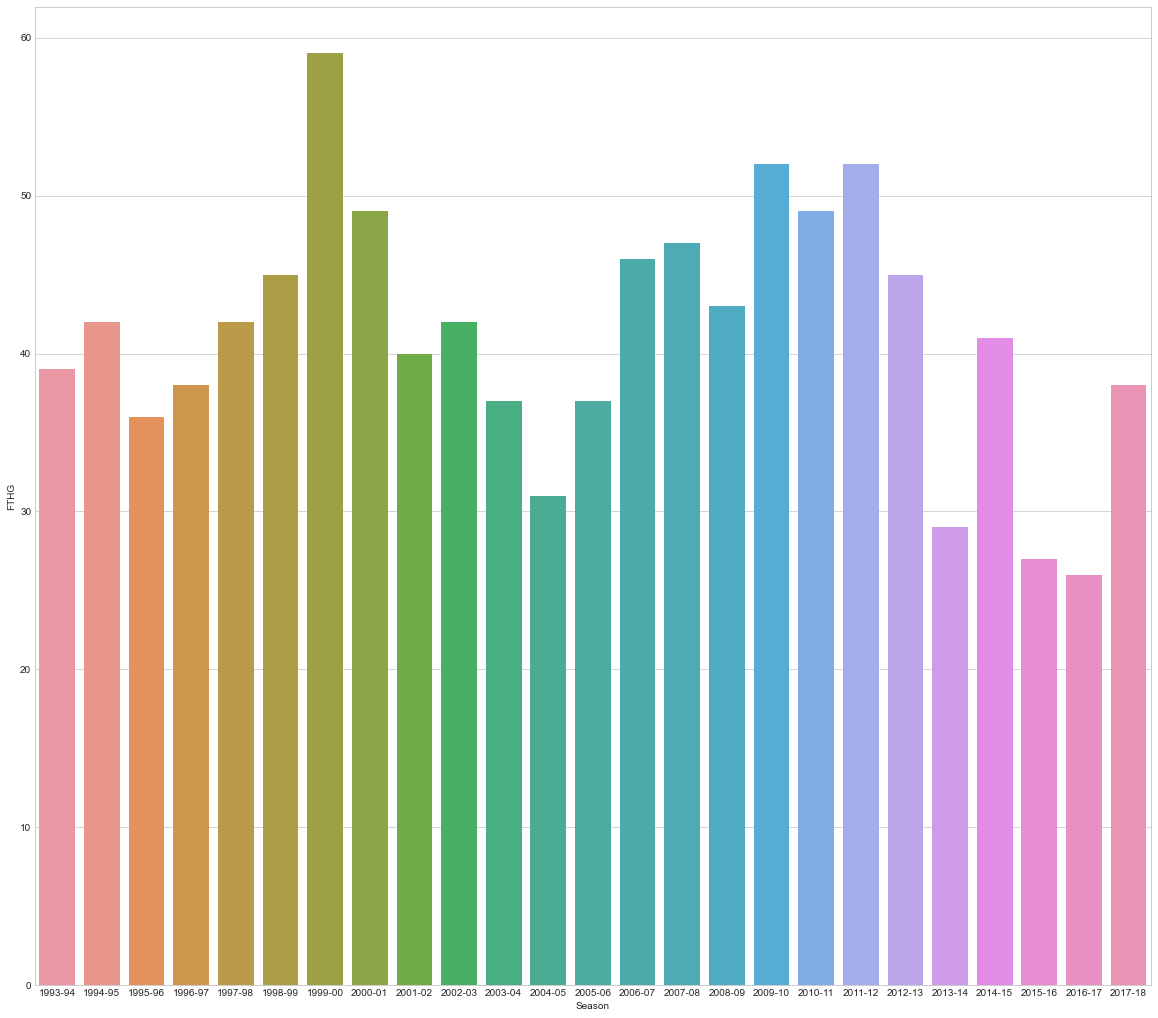

In [39]:
#Goal scored by Manutd at home
plt.rcParams['figure.figsize'] = [20, 18]
sns.barplot(x='Season', y='FTHG', data=utd)

Form above we can see that Manchester United has scored most *Home goals in season 1999-2000*.

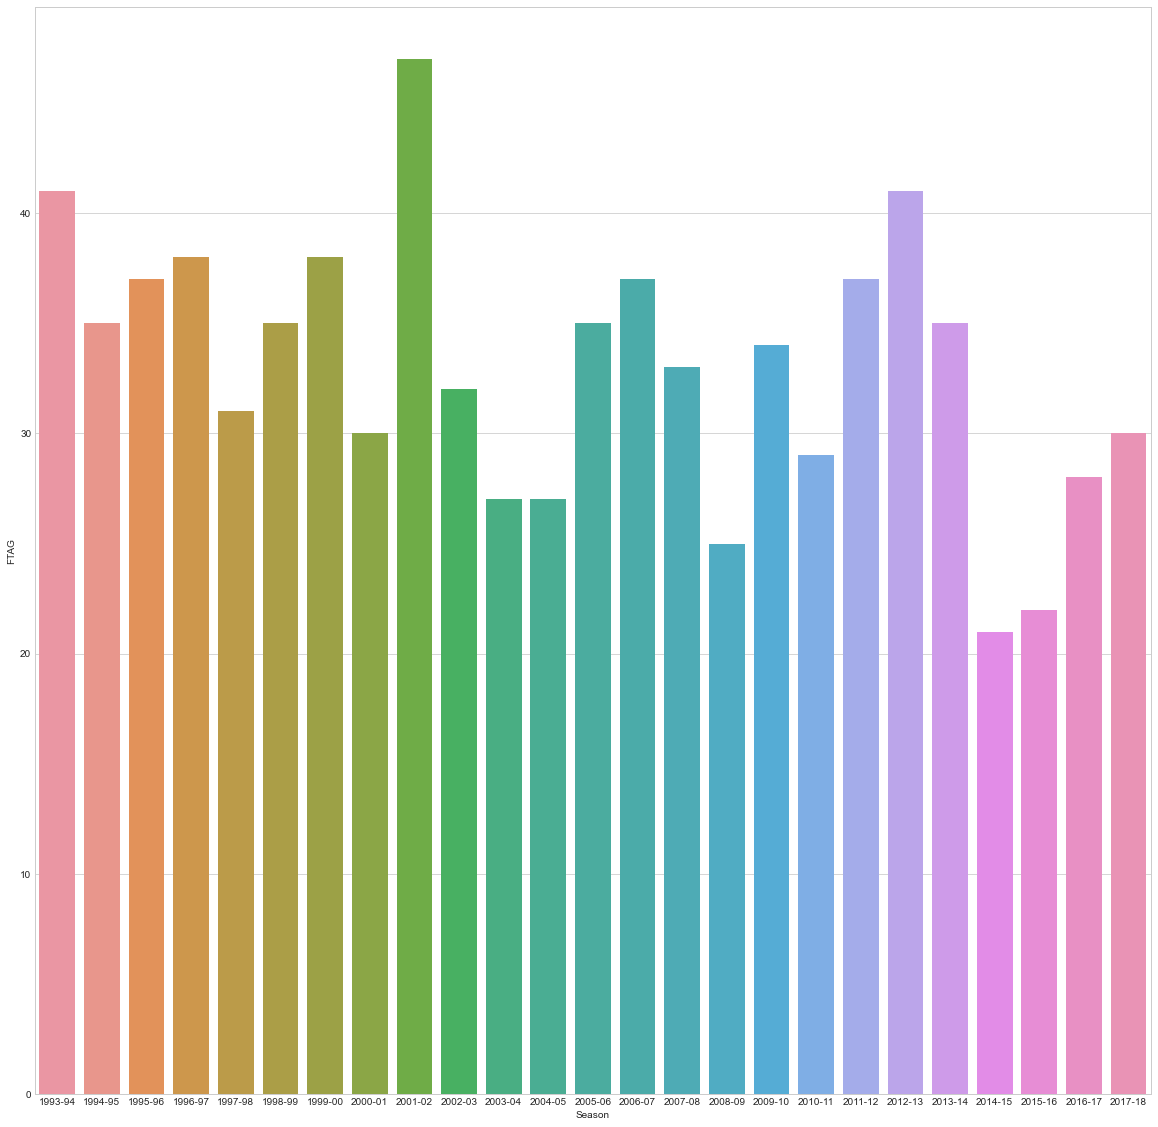

In [40]:
#Goal scored by Manutd away
autd = df_epl.groupby(['Season','AwayTeam']).FTAG.sum().reset_index()
autd = autd.loc[autd['AwayTeam'] == 'Man United']
plt.rcParams['figure.figsize'] = [20, 20]
sns.barplot(x='Season', y='FTAG', data=autd)

Form above we can see that Manchester United has scored most *Away goals in season 2001-02*.

Now let us see which teams take the first 4 spots in the every season.

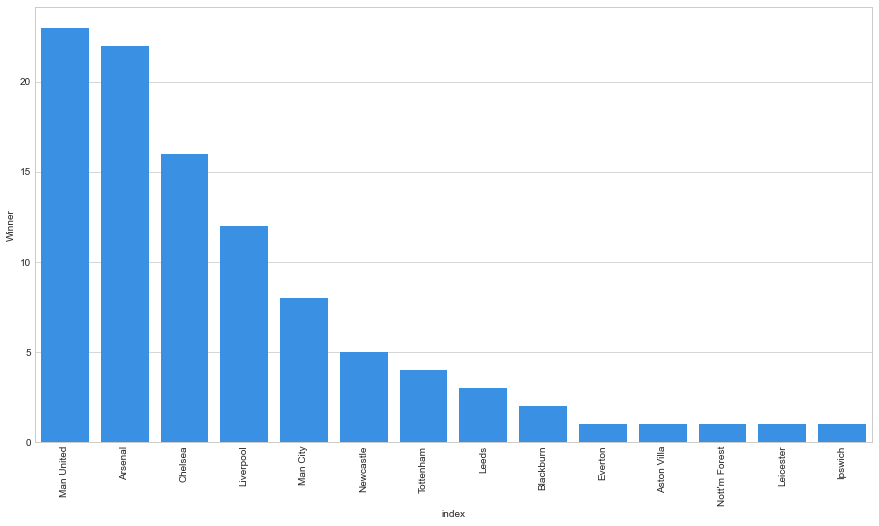

In [24]:
n=d.groupby('Season').head(4)
o=n['Winner'].value_counts().reset_index()
plt.figure(figsize=(15,8))
grid1=sns.barplot(x='index',y='Winner',data=o,color='dodgerblue')
grid1.set_xticklabels(o['index'],rotation=90)
plt.show()

Since Manchester United won more games every season we can compare its performance with top 5 teams.

Comparing between Manchester United and Chelsea

In [44]:
manche = df_epl[((df_epl['HomeTeam']=='Man United' )& (df_epl['AwayTeam']=='Chelsea'))|((df_epl['HomeTeam']=='Chelsea') & (df_epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count()

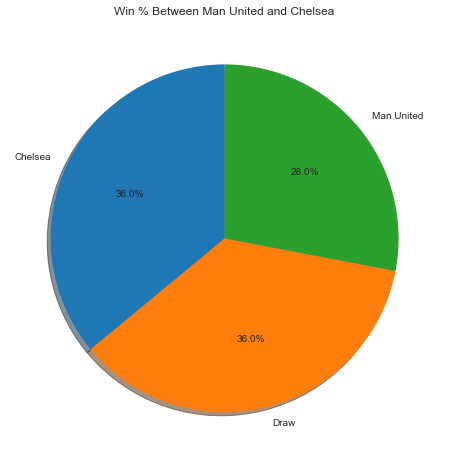

In [47]:
labels = (np.array(manche.index))
sizes = (np.array((manche / manche.sum())*100))

plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%3.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Man United and Chelsea")
plt.show()


Comparing between Manchester United and Arsenal

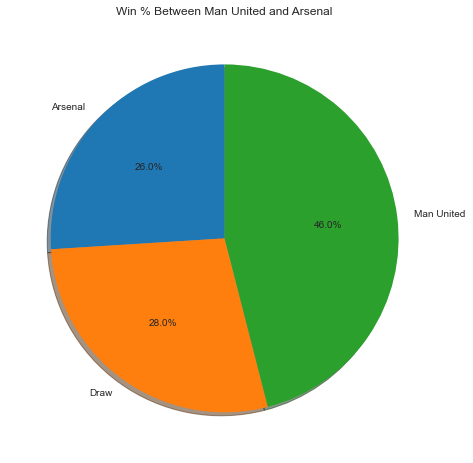

In [48]:
manars = df_epl[((df_epl['HomeTeam']=='Man United' )& (df_epl['AwayTeam']=='Arsenal'))|((df_epl['HomeTeam']=='Arsenal') & (df_epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(manars.index))
sizes = (np.array((manars / manars.sum())*100))

plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Man United and Arsenal")
plt.show()


Comparing between Manchester United and Liverpool

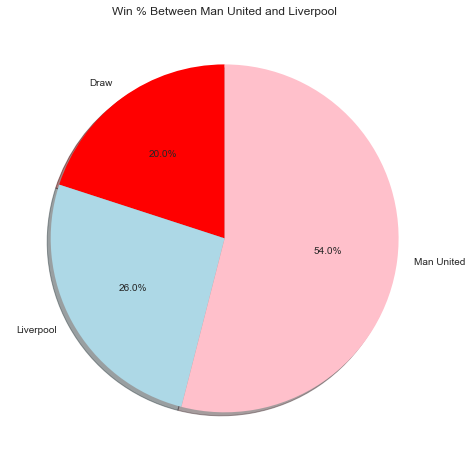

In [49]:
manliv = df_epl[((df_epl['HomeTeam']=='Man United' )& (df_epl['AwayTeam']=='Liverpool'))|((df_epl['HomeTeam']=='Liverpool') & (df_epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(manliv.index))
sizes = (np.array((manliv / manliv.sum())*100))
colors = ['Red', 'Lightblue','Pink']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Man United and Liverpool")
plt.show()

Comparing between Manchester United and Manchester City

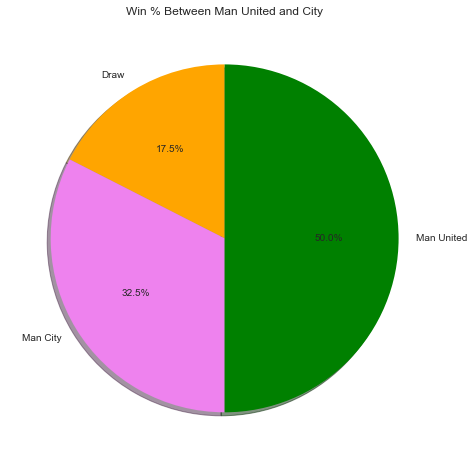

In [50]:
mancity = df_epl[((df_epl['HomeTeam']=='Man United' )& (df_epl['AwayTeam']=='Man City'))|((df_epl['HomeTeam']=='Man City') & (df_epl['AwayTeam']=='Man United'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(mancity.index))
sizes = (np.array((mancity / mancity.sum())*100))
colors = ['Orange', 'Violet','Green']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Man United and City")
plt.show()

Comparing between Chelsea and Arsenal

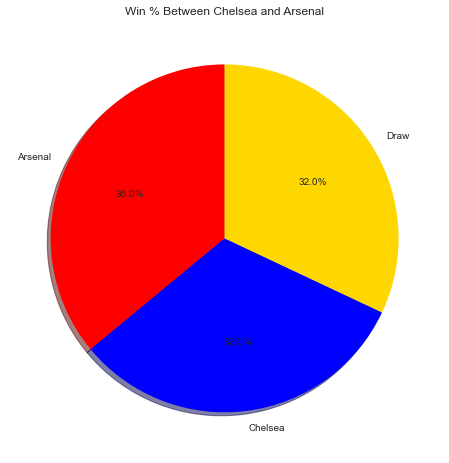

In [51]:
chears = df_epl[((df_epl['HomeTeam']=='Chelsea' )& (df_epl['AwayTeam']=='Arsenal'))|((df_epl['HomeTeam']=='Arsenal') & (df_epl['AwayTeam']=='Chelsea'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(chears.index))
sizes = (np.array((chears / chears.sum())*100))
colors = ['Red', 'blue','Gold']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Chelsea and Arsenal")
plt.show()

Comparing between Chelsea and Liverpool

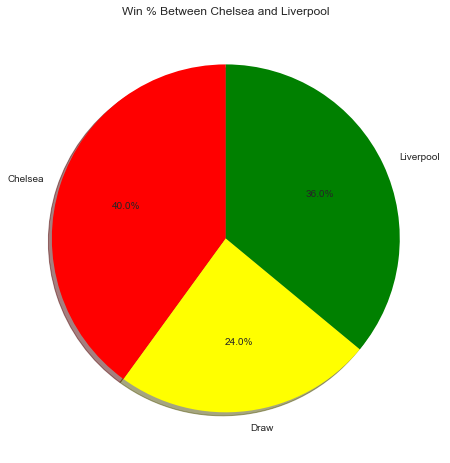

In [52]:
cheliv = df_epl[((df_epl['HomeTeam']=='Chelsea' )& (df_epl['AwayTeam']=='Liverpool'))|((df_epl['HomeTeam']=='Liverpool') & (df_epl['AwayTeam']=='Chelsea'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(cheliv.index))
sizes = (np.array((cheliv / cheliv.sum())*100))
colors = ['Red', 'yellow','green']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Chelsea and Liverpool")
plt.show()

Comparing between Chelsea and Manchester City

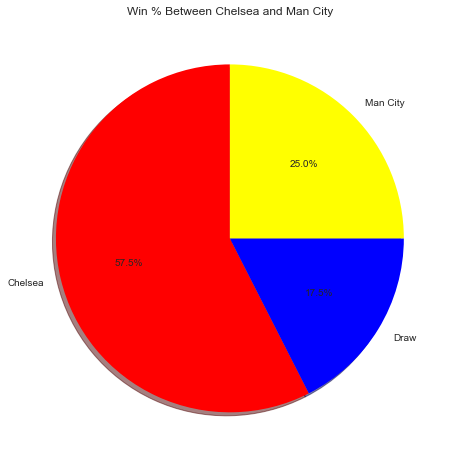

In [60]:
chemanc = df_epl[((df_epl['HomeTeam']=='Chelsea' )& (df_epl['AwayTeam']=='Man City'))|((df_epl['HomeTeam']=='Man City') & (df_epl['AwayTeam']=='Chelsea'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(chemanc.index))
sizes = (np.array((chemanc / chemanc.sum())*100))
colors = ['Red', 'blue','yellow']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Chelsea and Man City")
plt.show()

Comparing between Liverpool and Arsenal

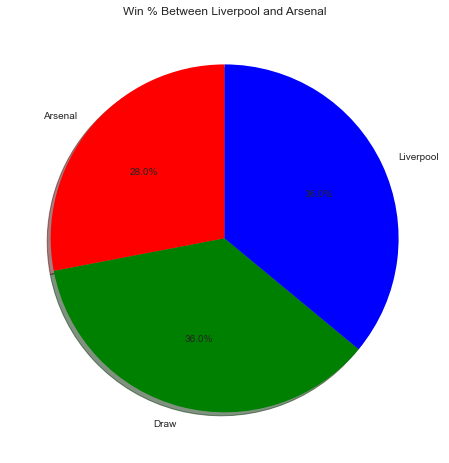

In [59]:
livars = df_epl[((df_epl['HomeTeam']=='Liverpool' )& (df_epl['AwayTeam']=='Arsenal'))|((df_epl['HomeTeam']=='Arsenal') & (df_epl['AwayTeam']=='Liverpool'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(livars.index))
sizes = (np.array((livars / livars.sum())*100))
colors = ['Red', 'green','blue']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Liverpool and Arsenal")
plt.show()


Comparing between Liverpool and Manchester City

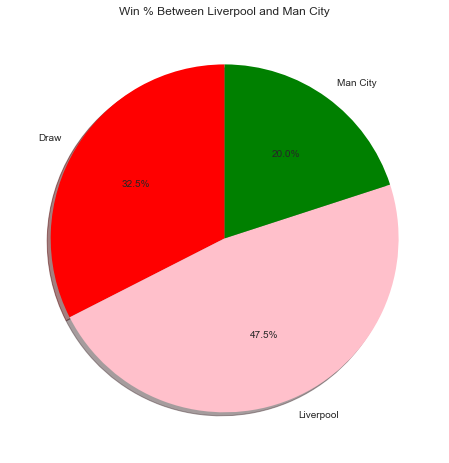

In [63]:
livmanc = df_epl[((df_epl['HomeTeam']=='Liverpool' )& (df_epl['AwayTeam']=='Man City'))|((df_epl['HomeTeam']=='Man City') & (df_epl['AwayTeam']=='Liverpool'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(livmanc.index))
sizes = (np.array((livmanc / livmanc.sum())*100))
colors = ['Red', 'pink','green']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Liverpool and Man City")
plt.show()


Comparing between Arsenal and Manchester City

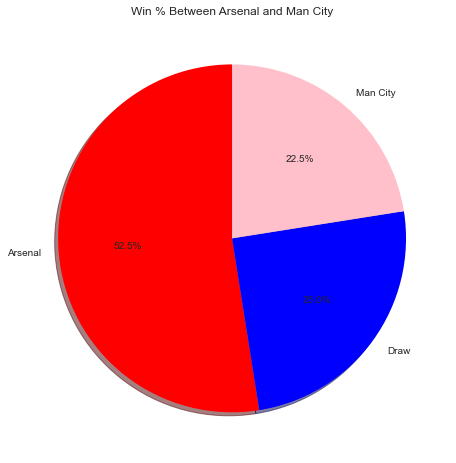

In [62]:
arsmanc = df_epl[((df_epl['HomeTeam']=='Arsenal' )& (df_epl['AwayTeam']=='Man City'))|((df_epl['HomeTeam']=='Man City') & (df_epl['AwayTeam']=='Arsenal'))].groupby(['Winner'])['Winner'].count()
labels = (np.array(arsmanc.index))
sizes = (np.array((arsmanc / arsmanc.sum())*100))
colors = ['Red', 'blue','pink']
plt.subplots(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win % Between Arsenal and Man City")
plt.show()

<a id=section503></a>
### 5.3 League progress over season

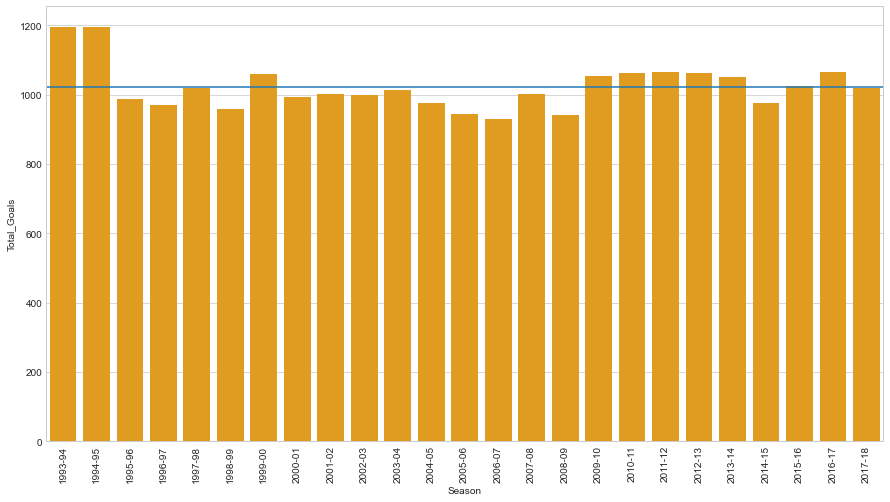

In [64]:
df_epl['Total_Goals']=df_epl['FTHG']+df_epl['FTAG']
l=df_epl.loc[:,['Season','Total_Goals']]
m=l.groupby('Season').sum().reset_index()
y=m['Total_Goals']
plt.figure(figsize=(15,8))
grid=sns.barplot(x='Season',y='Total_Goals',data=m,color='orange')
grid.set_xticklabels(m['Season'],rotation=90)
plt.axhline(y.mean())
plt.show()

**Overall wins at home, Draw and Away wins**

In [66]:
x=df_epl.loc[:,['Season','FTR']]
y=x.groupby(['Season', 'FTR']).size().reset_index(name='counts')
y

,Season,FTR,counts
0,1993-94,A,128
1,1993-94,D,142
2,1993-94,H,192
3,1994-95,A,123
4,1994-95,D,134
...,...,...,...
70,2016-17,D,84
71,2016-17,H,187
72,2017-18,A,108
73,2017-18,D,99


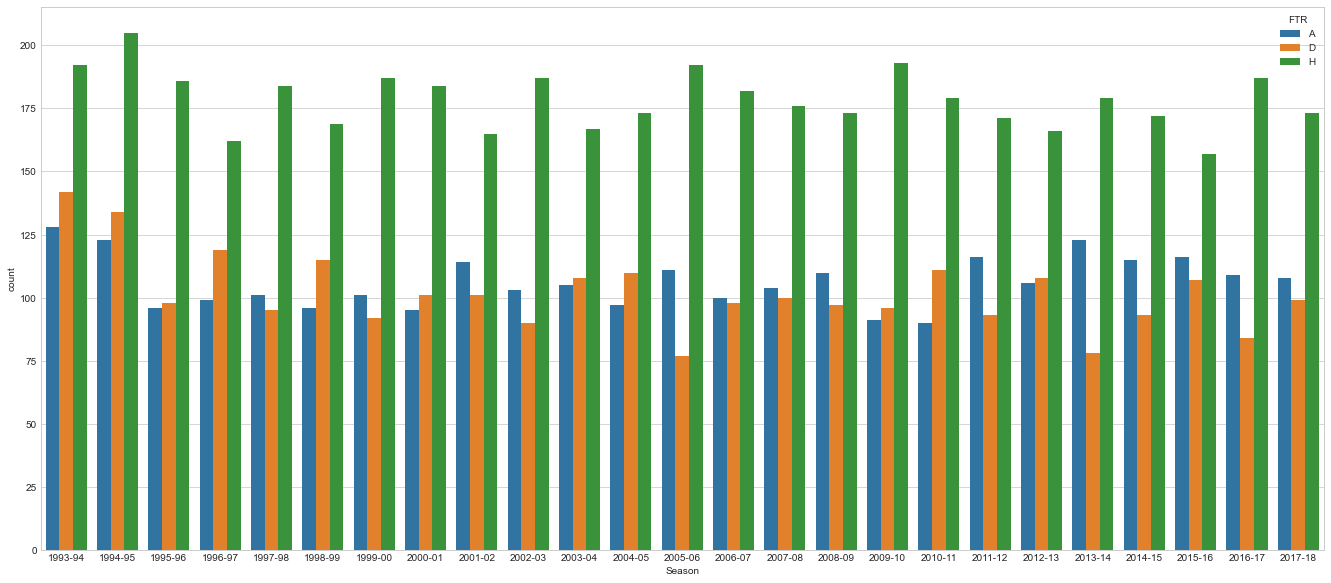

In [67]:
plt.figure(figsize=(23, 10))
sns.countplot(df_epl['Season'], hue = df_epl['FTR'])

**Result of teams at full time** 

In [68]:
df_epl['FTR'].value_counts()

H    4461
A    2657
D    2546
Name: FTR, dtype: int64

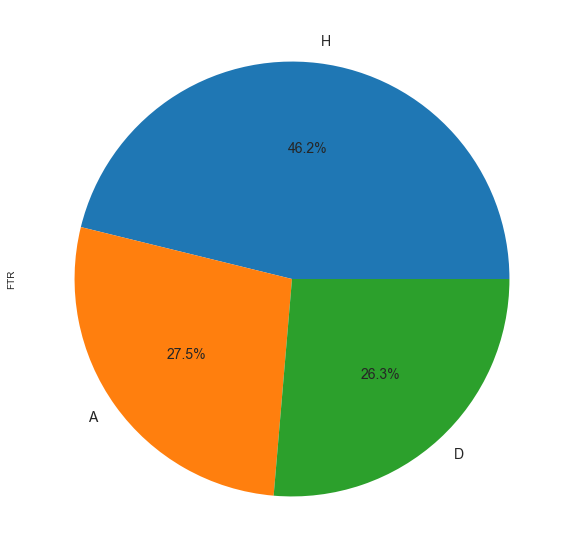

In [69]:
df_epl['FTR'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%',figsize=(10,10))

From above we can see that more than 4000 times teams at **Home** have won

<a id=section6></a>
### 6.How to win, sustain in Premier league

**Analyzing data at half time**

In [28]:
#Now that we have subset our data, we label the winners for half_time
conditions1=[df_epl['HTR']=='A',df_epl['HTR']=='H',df_epl['HTR']=='D']
choices1 = [df_epl['AwayTeam'],df_epl['HomeTeam'],'Draw']
df_epl['Half_Time_Winner']=np.select(conditions1,choices1)

In [29]:
#Now let us tabulate data so that we can how many times each team wins in every Season.
f=df_epl.loc[:,['Season','Half_Time_Winner']]
g=f.groupby(['Season', 'Half_Time_Winner']).size().reset_index(name='counts')
h=g.sort_values(['Season', 'counts'], ascending=[True, False])
h


,Season,Half_Time_Winner,counts
0,1993-94,0,462
1,1994-95,0,462
8,1995-96,Draw,167
13,1995-96,Man United,18
15,1995-96,Newcastle,18
...,...,...,...
477,2017-18,Newcastle,8
483,2017-18,West Brom,8
466,2017-18,Brighton,7
465,2017-18,Bournemouth,6


**There are a large number of draws even at half time.**

In [30]:
#We can check the games won by ignoring the games that are at a draw during half time. 
i=h[h.Half_Time_Winner.str.contains('Draw')==False]
i

,Season,Half_Time_Winner,counts
13,1995-96,Man United,18
15,1995-96,Newcastle,18
4,1995-96,Blackburn,14
16,1995-96,Nott'm Forest,14
3,1995-96,Aston Villa,13
...,...,...,...
477,2017-18,Newcastle,8
483,2017-18,West Brom,8
466,2017-18,Brighton,7
465,2017-18,Bournemouth,6


In [31]:
#Now that we have how many games each team wins every season we can check which team wins the most games in each season at half time. 
j=i.groupby('Season').head(1)
j

,Season,Half_Time_Winner,counts
13,1995-96,Man United,18
26,1996-97,Chelsea,18
44,1997-98,Arsenal,18
65,1998-99,Arsenal,20
97,1999-00,Man United,17
121,2000-01,Man United,19
133,2001-02,Chelsea,20
149,2002-03,Arsenal,21
170,2003-04,Arsenal,18
191,2004-05,Arsenal,21


In [32]:
#Thus overall at half time throughout all the seasons we can see which teams are wining how mnay times.
y=j['Half_Time_Winner'].value_counts().reset_index()
y

,index,Half_Time_Winner
0,Man United,8
1,Arsenal,6
2,Chelsea,6
3,Leicester,1
4,Man City,1
5,Liverpool,1


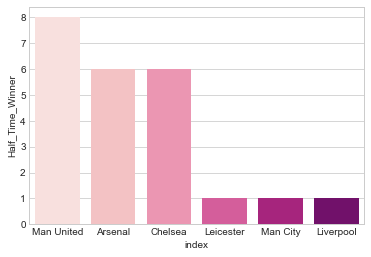

In [13]:
#This plots the teams that win during half-time.
figsize = (20,10)
sns.barplot(x='index', y='Half_Time_Winner', data=y, palette='RdPu')

To check for the teams winning both at half time and at the end, we use our subsetted data.

In [33]:
#Now we can check to see if the same team wins both at half time and at the end.
k=df_epl
k['Same Winner']=np.where(k['Winner']==k['Half_Time_Winner'],1,0)
k

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Half_Time_Winner,Same Winner
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94,Coventry,0,0
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94,Aston Villa,0,0
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94,Blackburn,0,0
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94,Liverpool,0,0
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94,Draw,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18,Newcastle,Newcastle,1
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18,Man City,Draw,0
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18,Stoke,Stoke,1
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18,Tottenham,Leicester,0


In [34]:
k[k['Same Winner']==1].head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Half_Time_Winner,Same Winner
924,E0,19/08/95,Aston Villa,Man United,3,1,H,3.0,0.0,H,1995-96,Aston Villa,Aston Villa,1
925,E0,19/08/95,Blackburn,QPR,1,0,H,1.0,0.0,H,1995-96,Blackburn,Blackburn,1
926,E0,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,Draw,Draw,1
929,E0,19/08/95,Newcastle,Coventry,3,0,H,1.0,0.0,H,1995-96,Newcastle,Newcastle,1
930,E0,19/08/95,Southampton,Nott'm Forest,3,4,A,1.0,3.0,A,1995-96,Nott'm Forest,Nott'm Forest,1


In [35]:
x=k[(k.Winner.str.contains('Draw')==False)&(k.Half_Time_Winner.str.contains('Draw')==False)]
print(x['Same Winner'].sum())
print(len(x))
print(3864/4207)

3868
4207
0.9184692179700499


In [36]:
q=k[(k.Winner.str.contains('Draw')==False)|(k.Half_Time_Winner.str.contains('Draw')==False)]
q.head()
print(len(q))
print(x['Same Winner'].sum())
print(3868/7324)

7972
3868
0.5281267067176406


In [37]:
#We define a new dataset that contains all the data that has no Draw data.
epl_data_half_nodraw=df_epl[df_epl.Half_Time_Winner.str.contains('Draw')==False]
epl_data_half_nodraw=epl_data_half_nodraw[epl_data_half_nodraw.Winner.str.contains('Draw')==False]
epl_data_half_nodraw['Same Winner']=np.where(epl_data_half_nodraw['Winner']==epl_data_half_nodraw['Half_Time_Winner'],1,0)
df_epl['Same Winner']=np.where(df_epl['Winner']==df_epl['Half_Time_Winner'],1,0)
#Now we define a datset for no draw data with the full dataset
epl_data_nodraw=df_epl[df_epl.Winner.str.contains('Draw')==False]

- This gives us the games that are draw at half time but are won by a team in the end. There are 2236 such games.

In [39]:
df_epl[(df_epl['Half_Time_Winner']=='Draw') & (df_epl['Same Winner']==0)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Half_Time_Winner,Same Winner
927,E0,19/08/95,Liverpool,Sheffield Weds,1,0,H,0.0,0.0,D,1995-96,Liverpool,Draw,0
932,E0,19/08/95,Wimbledon,Bolton,3,2,H,2.0,2.0,D,1995-96,Wimbledon,Draw,0
934,E0,21/08/95,Leeds,Liverpool,1,0,H,0.0,0.0,D,1995-96,Leeds,Draw,0
937,E0,23/08/95,Everton,Arsenal,0,2,A,0.0,0.0,D,1995-96,Arsenal,Draw,0
938,E0,23/08/95,Man United,West Ham,2,1,H,0.0,0.0,D,1995-96,Man United,Draw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,E0,5/5/2018,West Brom,Tottenham,1,0,H,0.0,0.0,D,2017-18,West Brom,Draw,0
9648,E0,8/5/2018,Swansea,Southampton,0,1,A,0.0,0.0,D,2017-18,Southampton,Draw,0
9652,E0,9/5/2018,Tottenham,Newcastle,1,0,H,0.0,0.0,D,2017-18,Tottenham,Draw,0
9655,E0,13/05/18,Crystal Palace,West Brom,2,0,H,0.0,0.0,D,2017-18,Crystal Palace,Draw,0


- These are the games that end in draw when the game is at draw at half time also. There are 1416 such games

In [41]:
df_epl[(df_epl['Winner']=='Draw') & (df_epl['Same Winner']==1)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Half_Time_Winner,Same Winner
926,E0,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96,Draw,Draw,1
933,E0,20/08/95,Arsenal,Middlesbrough,1,1,D,1.0,1.0,D,1995-96,Draw,Draw,1
939,E0,23/08/95,Nott'm Forest,Chelsea,0,0,D,0.0,0.0,D,1995-96,Draw,Draw,1
944,E0,26/08/95,Coventry,Arsenal,0,0,D,0.0,0.0,D,1995-96,Draw,Draw,1
949,E0,26/08/95,Nott'm Forest,West Ham,1,1,D,1.0,1.0,D,1995-96,Draw,Draw,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,E0,28/04/18,Liverpool,Stoke,0,0,D,0.0,0.0,D,2017-18,Draw,Draw,1
9640,E0,5/5/2018,Everton,Southampton,1,1,D,0.0,0.0,D,2017-18,Draw,Draw,1
9647,E0,6/5/2018,Man City,Huddersfield,0,0,D,0.0,0.0,D,2017-18,Draw,Draw,1
9649,E0,9/5/2018,Chelsea,Huddersfield,1,1,D,0.0,0.0,D,2017-18,Draw,Draw,1


In [42]:
print(2263/(1416+2263))

0.6151128023919543


In [43]:
print(5824/8740)

0.6663615560640732


In [44]:
print((5824-1416)/(8740-1416))

0.6018569087930092


#### To check for Home Advantage.

In [45]:
df_epl[df_epl['FTR']=='H']
#These are all the times a Home team has won.

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,Winner,Half_Time_Winner,Same Winner
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94,Aston Villa,0,0
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94,Liverpool,0,0
7,E0,14/08/93,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,1993-94,Sheffield United,0,0
12,E0,17/08/93,Everton,Man City,1,0,H,NaN,NaN,NaN,1993-94,Everton,0,0
13,E0,17/08/93,Ipswich,Southampton,1,0,H,NaN,NaN,NaN,1993-94,Ipswich,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2.0,0.0,H,2017-18,Liverpool,Liverpool,1
9658,E0,13/05/18,Man United,Watford,1,0,H,1.0,0.0,H,2017-18,Man United,Man United,1
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18,Newcastle,Newcastle,1
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18,Tottenham,Leicester,0


In [46]:
#we check the number matches that are not draw 
print(len(epl_data_nodraw))
print(4461/7118)

7118
0.6267209890418657


<a id=section7></a>
### 7. Conclusion

- The seasons of 93-94 and 94-95 have the highest number of goals. Seasons between 10 and 14 have done better than average number of goals. However no years since 95 have been better for the number of goals.
- About 3868 times out of 7324 matches the team who wins at half time also wins at full time. Thus we can say 92% of the time the match is won by the team wining at half time. This is true if a draw match is not considered.
- If draws are included then there is a 52% chance the match is won by the team at half time or ends in a draw.
- There we can say the 62% of the games that are at draw at half time will be won by a team. 
- If we include draw matches and check whether that the result at half time is the result at the end.There is a 66% chance that it will remain the same.
- Removing matches that are draw at both times we get a 60% chance that we get the same result. 
- We can see that the success rate falls when draw matches are included.
- Thus the home team wins 62% of the time. Thus there is definitely an advantage when playing on the home field, however the difference is not too large.

<a id=section8></a>
### 8. Actionable Insights

- It's tradition and kind of fun to go to a game on Boxing Day, but I'm sure the players would like a Christmas Break. All the other big leagues do it for some amount of time and it doesn't seem to affect them. It probably will never happen, but it could be a big help for the league. The fixture list is really congested and playing at Christmas is almost a necessity.
- Word is that the English FA is considering using goal-line technology next season. This would certainly decrease the number of manager complaints across the league. The positive effects of goal-line technology are obvious and managers surely wouldn't have any objection. It would help referees make difficult decisions in a league where every one counts.
- Let's say Arsenal teams up with a team in the lower divisions like Bournemouth AFC. Arsenal then says they will inject some cash to upgrade facilities and technology, etc. They would share training knowledge and coaches could go either way to learn and impart knowledge. Through all that, Arsenal would have first dibs on the hottest talents the club produces. Talents that would be English of course.
- The January window has become a virtual non-entity. Clubs gain no value, and it provides an underserved safety net to those who didn’t act appropriately the previous summer, or who have failed to plan appropriately for the next one. You’d get the summer to build your squad, and that’s that. The only exceptions would be loan deals to Football League clubs from Premier League sides for those aged under 21, which could happen all season long. 